In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df  = pd.read_csv("Social_Network_Ads.csv")

In [7]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
106,15706185,Female,26,35000,0
350,15800515,Female,38,113000,1
58,15642885,Male,22,18000,0
174,15644296,Female,34,72000,0
185,15814816,Male,31,66000,0


In [12]:
X = df.iloc[:, 2:4] 

In [14]:
X.sample(10)

,Age,EstimatedSalary
22,48,41000
273,39,106000
261,36,144000
270,43,133000
24,46,23000
81,39,42000
87,28,85000
184,33,60000
89,35,50000
322,41,52000


In [15]:
Y = df["Purchased"]

In [16]:
Y.sample(10)

1      0
28     0
352    1
151    0
86     0
192    0
58     0
332    0
204    1
246    0
Name: Purchased, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size=0.3 , random_state=0)

In [20]:
X_train.shape ,X_test.shape

((280, 2), (120, 2))

In [28]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)
X_TRAIN_SCALED = Scaler.transform(X_train)
X_TEST_SCALED = Scaler.transform(X_test)


In [29]:

Scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [31]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [35]:
X_TRAIN_SCALED

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [37]:
X_train_scaled = pd.DataFrame(X_TRAIN_SCALED, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_TEST_SCALED, columns=X_test.columns)

In [39]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [40]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


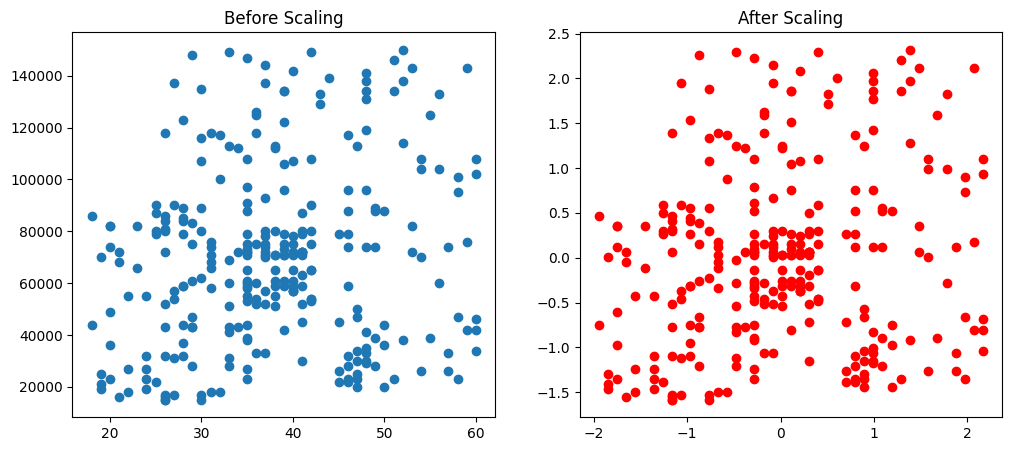

In [57]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4832\3888722025.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], ax=ax1,hist=False)
C:\Users\User\AppData\Local\Temp\ipykernel_4832\3888722025.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['EstimatedSal

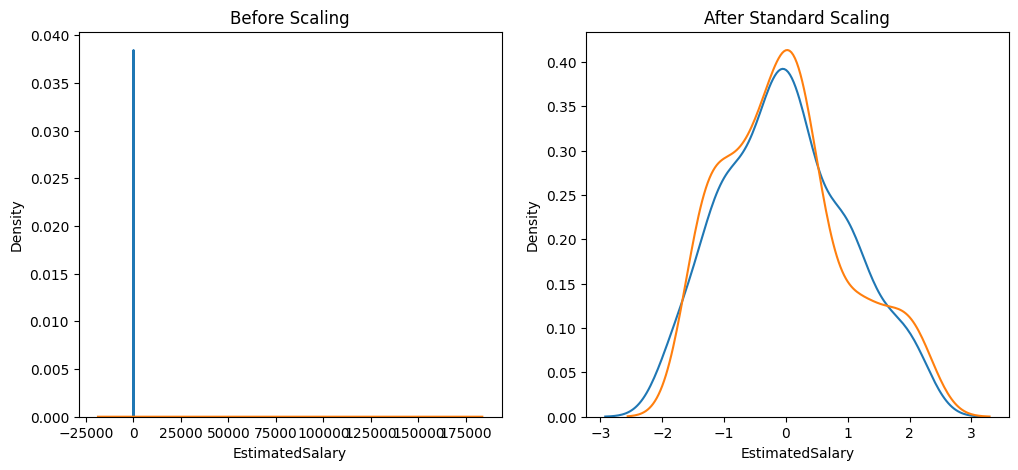

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.distplot(X_train['Age'], ax=ax1,hist=False)
sns.distplot(X_train['EstimatedSalary'], ax=ax1,hist=False)

# after scaling
ax2.set_title('After Standard Scaling')
sns.distplot(X_train_scaled['Age'], ax=ax2,hist=False)
sns.distplot(X_train_scaled['EstimatedSalary'], ax=ax2,hist=False)
plt.show()


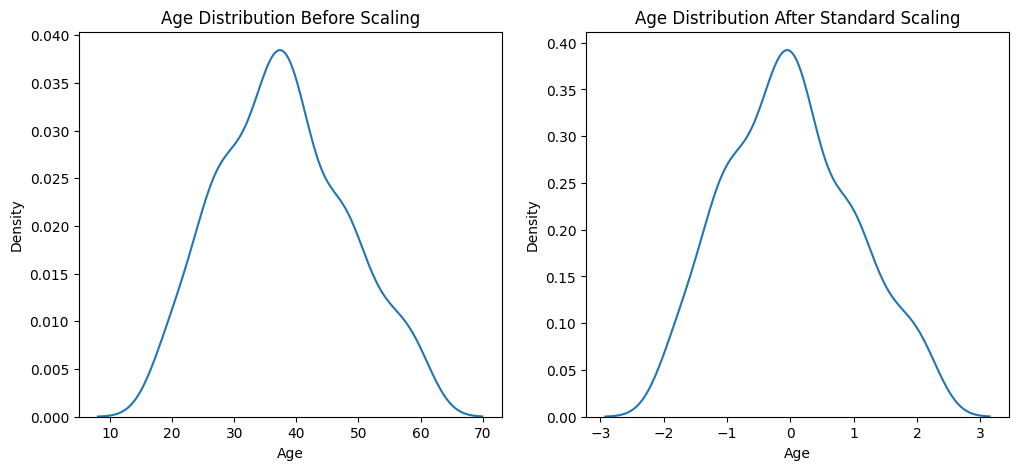

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

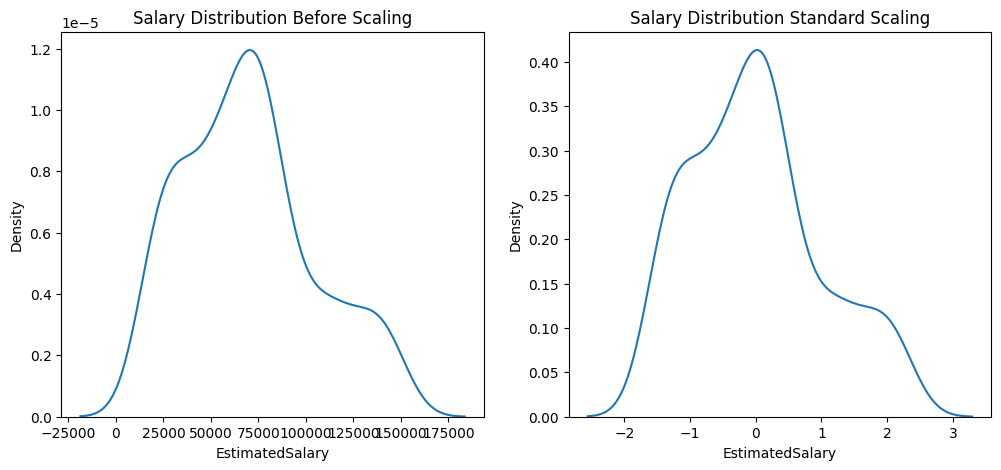

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()